In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ninzaami/loan-predication")

print("Path to dataset files:", path)

/Users/brendanz/Documents/school/mini-project-2/mini-project-2-group10/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/brendanz/.cache/kagglehub/datasets/ninzaami/loan-predication/versions/1


In [4]:
# ===============================
# Colab Environment Setup
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
from sklearn.impute import SimpleImputer # Added this line

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

RANDOM_STATE = 42
plt.style.use("default")

In [ ]:
# ===============================
# Load Dataset
# ===============================
import os

file_path = os.path.join(path, "train_u6lujuX_CVtuZ9i (1).csv")
df = pd.read_csv(file_path)


print("Dataset shape:", df.shape)
df.head()

Stored 'df' (DataFrame)
Dataset shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
# ===============================
# Data Types & Missing Values
# ===============================
df.info()

missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0]
%store df 

<class 'pandas.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    str    
 1   Gender             601 non-null    str    
 2   Married            611 non-null    str    
 3   Dependents         599 non-null    str    
 4   Education          614 non-null    str    
 5   Self_Employed      582 non-null    str    
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    str    
 12  Loan_Status        614 non-null    str    
dtypes: float64(4), int64(1), str(8)
memory usage: 62.5 KB
Stored 'df' (DataFrame)


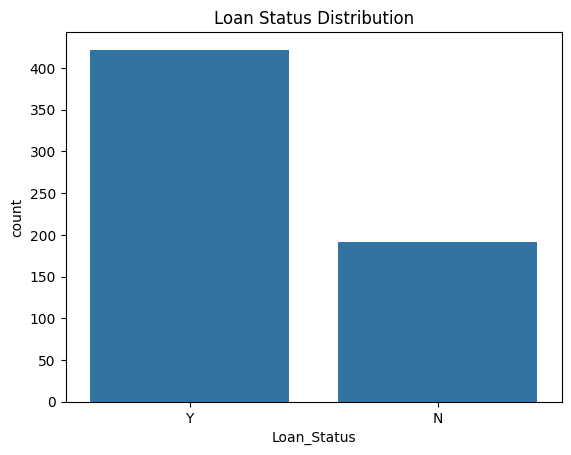

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

In [7]:
# ===============================
# Target Distribution
# ===============================
target_counts = df["Loan_Status"].value_counts(normalize=True)

sns.countplot(data=df, x="Loan_Status")
plt.title("Loan Status Distribution")
plt.show()

target_counts

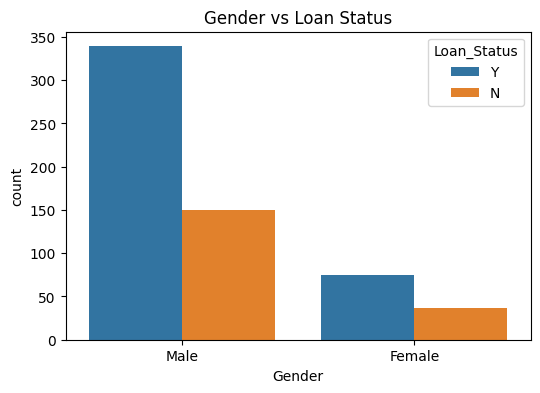

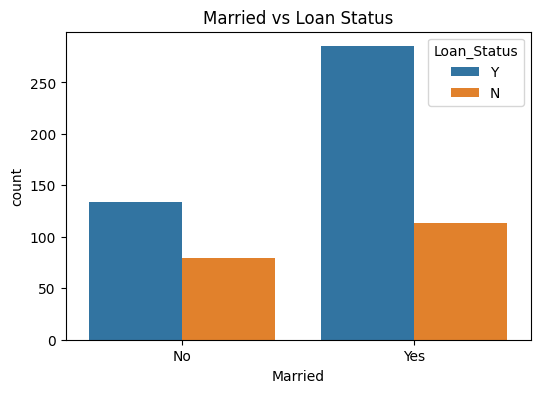

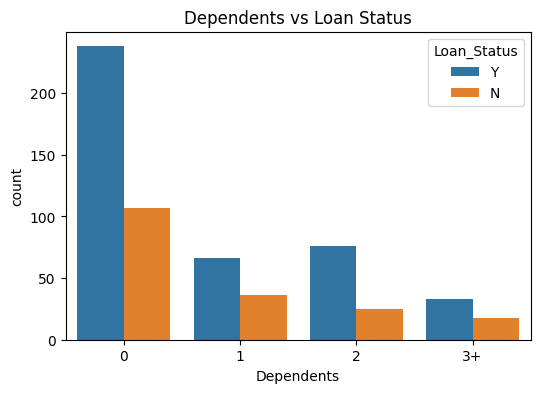

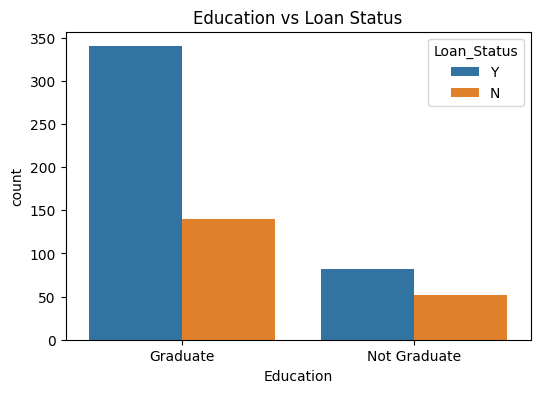

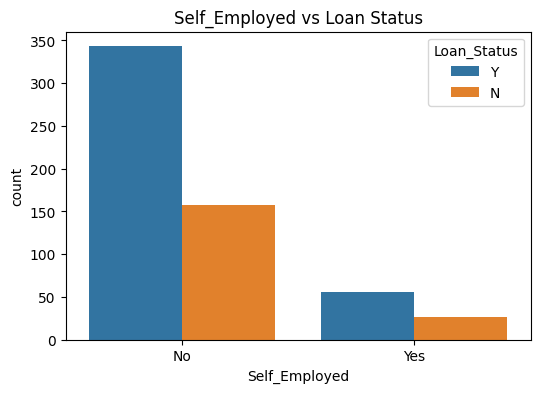

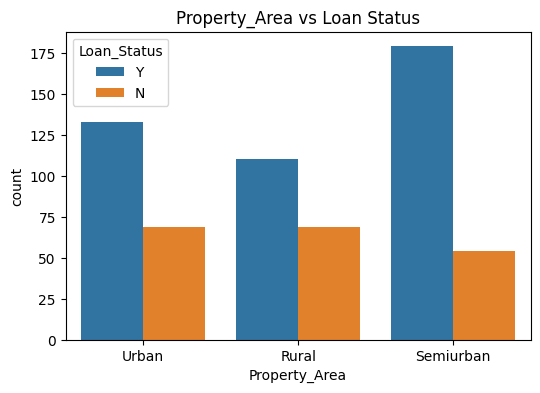

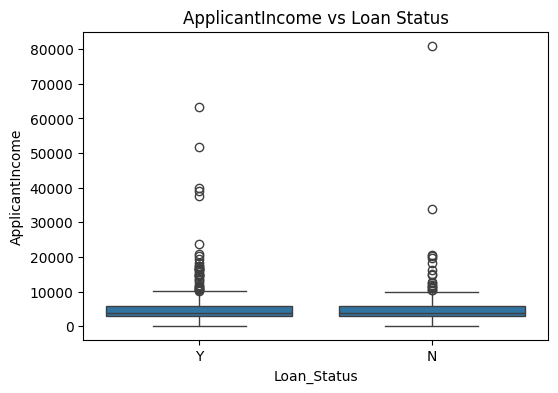

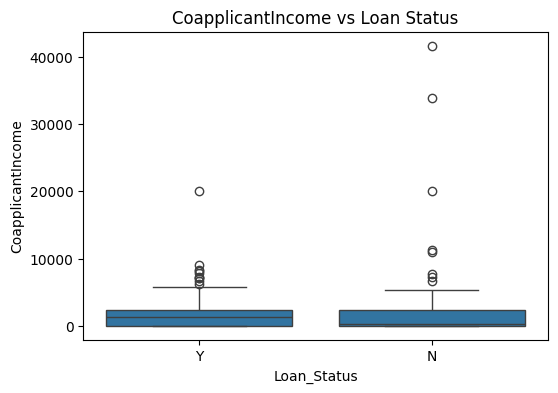

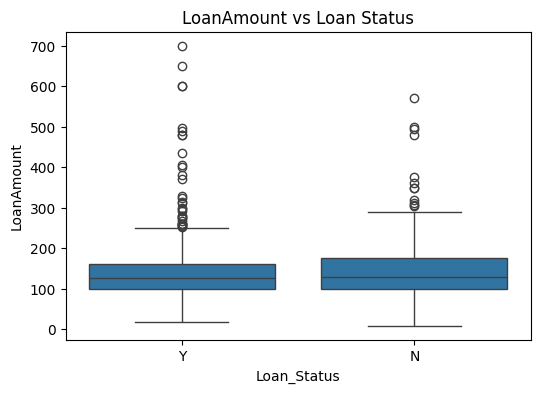

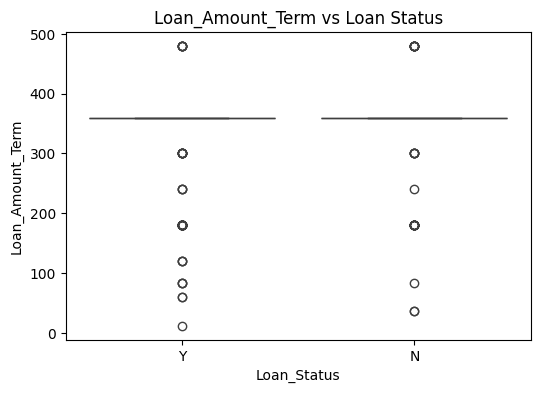

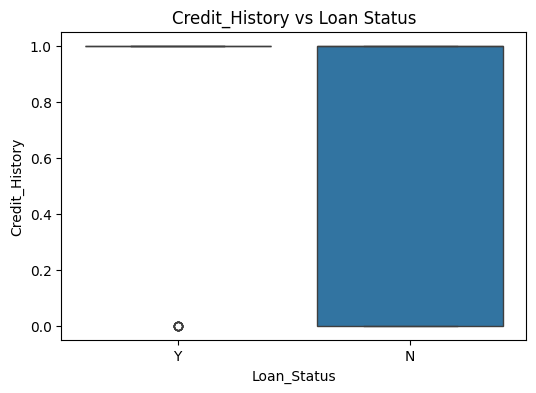

In [8]:
# ===============================
# Feature Visualizations
# ===============================

categorical_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]
numerical_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]       
for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=feature, hue="Loan_Status")
    plt.title(f"{feature} vs Loan Status")
    plt.show()
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="Loan_Status", y=feature)
    plt.title(f"{feature} vs Loan Status")
    plt.show()


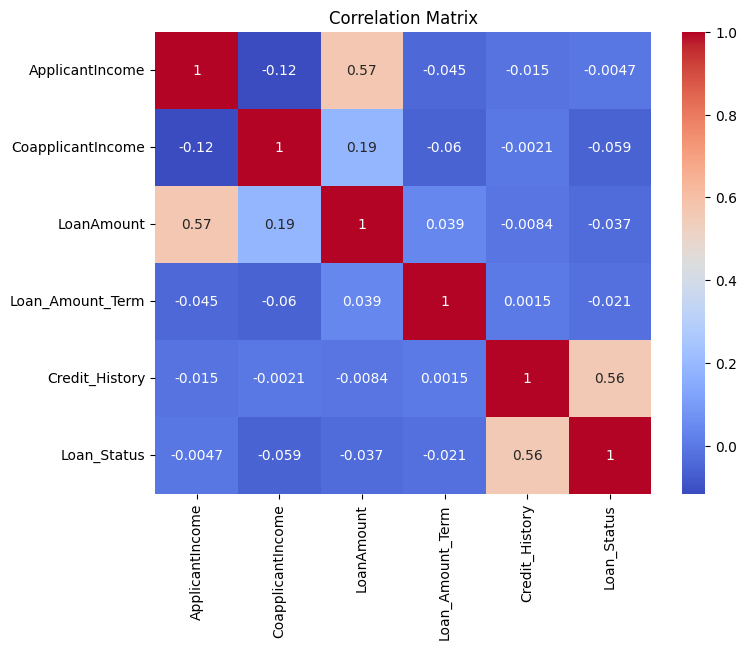

In [9]:
# ===============================
# Correlation analysis
# ===============================
plt.figure(figsize=(8,6))
corr = df[numerical_features + ["Loan_Status"]].copy()
corr["Loan_Status"] = corr["Loan_Status"].map({"Y": 1, "N": 0})
sns.heatmap(corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()  